In [1]:
import scipy.io
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw2/data21.mat')
A1 = torch.tensor(data['A_1'])
A2 = torch.tensor(data['A_2'])
B1 = torch.tensor(data['B_1'].flatten())
B2 = torch.tensor(data['B_2'].flatten())

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.lin1=nn.Linear(10,128)
        self.relu=nn.ReLU()
        self.lin2=nn.Linear(128,784)
        self.sigmoid=nn.Sigmoid()
    def forward(self,x):
        x=self.lin1(x)
        x=self.relu(x)
        x=self.lin2(x)
        x=self.sigmoid(-x)
        return x
    
def initialize(G):
    state_dict=G.state_dict()
    state_dict['lin1.weight']=A1
    state_dict['lin1.bias']=B1
    state_dict['lin2.weight']=A2
    state_dict['lin2.bias']=B2
    G.load_state_dict(state_dict)
Gen=Generator()
initialize(Gen)

In [4]:
Z1=torch.tensor(np.random.normal(0, 1, (100,10)),dtype=torch.float)
out=Gen(Z1[:])

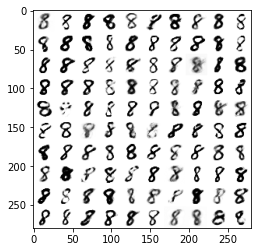

In [17]:
outs=[]
for j in range(10):
    outs.append(np.concatenate([out[i+j*10].reshape(28,28).T.detach().numpy() for i in range(10)] ,axis=1))

final=np.concatenate(outs,axis=0)
plt.imshow(final,cmap='gray')

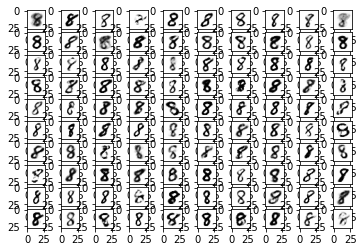

In [531]:
f, axarr = plt.subplots(10,10)
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(out[i*10+j].reshape(28,28).T.detach(),cmap='gray')

# Task2

In [49]:
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw2/data22.mat')
Xi=data['X_i']
Xn=torch.tensor(data['X_n'],dtype=torch.float)

In [533]:
N=500
T1=torch.tensor(np.concatenate((np.identity(N),np.zeros((N,784-N))),axis=1),dtype=torch.float)

In [20]:
def Cost(T,G,Z,X):
    return len(X)* torch.log(torch.sum((T@G-X)**2)) +torch.sum(Z**2)

In [246]:
N=300
T1=torch.tensor(np.concatenate((np.identity(N),np.zeros((N,784-N))),axis=1),dtype=torch.float)
Z_finals=[]
Iters=1000
for k in range(4):
    Xnoise=T1@Xn[:,k]
    Z=torch.tensor(np.random.normal(0, 1, (10)),dtype=torch.float,requires_grad=True)
    optimizer = torch.optim.Adam([Z], lr=5e-2)
    for i in range(Iters):
        X=Gen(Z)
        Error=Cost(T1,X,Z,Xnoise)
        optimizer.zero_grad()
        Error.backward()
        optimizer.step()
        if i%100==0:
            print(f'Image: {k},Epoch: {i},Error:{Error.item()}')
    Z_finals.append(Z)

Image: 0,Epoch: 0,Error:852.6983642578125
Image: 0,Epoch: 100,Error:304.0006408691406
Image: 0,Epoch: 200,Error:298.315673828125
Image: 0,Epoch: 300,Error:296.24383544921875
Image: 0,Epoch: 400,Error:294.9486083984375
Image: 0,Epoch: 500,Error:293.4143371582031
Image: 0,Epoch: 600,Error:292.36419677734375
Image: 0,Epoch: 700,Error:291.9723205566406
Image: 0,Epoch: 800,Error:291.6337890625
Image: 0,Epoch: 900,Error:291.5047302246094
Image: 1,Epoch: 0,Error:567.909912109375
Image: 1,Epoch: 100,Error:416.5849914550781
Image: 1,Epoch: 200,Error:339.8583068847656
Image: 1,Epoch: 300,Error:335.931884765625
Image: 1,Epoch: 400,Error:334.662841796875
Image: 1,Epoch: 500,Error:334.653564453125
Image: 1,Epoch: 600,Error:334.65423583984375
Image: 1,Epoch: 700,Error:334.65643310546875
Image: 1,Epoch: 800,Error:334.6565246582031
Image: 1,Epoch: 900,Error:334.6564025878906
Image: 2,Epoch: 0,Error:1016.6286010742188
Image: 2,Epoch: 100,Error:448.95208740234375
Image: 2,Epoch: 200,Error:431.9526367187

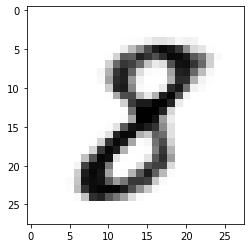

In [250]:
G=Gen(Z_finals[3])
plt.imshow(G.reshape(28,28).T.detach().numpy(),cmap='gray')

In [219]:
Xclean=[]
for i in range(4):
    Xclean.append(Xi[:,i].reshape(28,28).T)
Clean=np.concatenate((Xclean),axis=0)
Xnoise=[]
for i in range(4):
    Xnoise.append(dummy[:,i].reshape(28,28).T)
Noise=np.concatenate((Xnoise),axis=0)
G400=[]
for i in range(4):
    G400.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy400=np.concatenate((G400),axis=0)

In [117]:
G500=[]
for i in range(4):
    G500.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy500=np.concatenate((G500),axis=0)

In [166]:
G400=[]
for i in range(4):
    G400.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy400=np.concatenate((G400),axis=0)

In [129]:
G350=[]
for i in range(4):
    G350.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy350=np.concatenate((G350),axis=0)

In [251]:
G300=[]
for i in range(4):
    G300.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy300=np.concatenate((G300),axis=0)

In [222]:
G200=[]
for i in range(4):
    G200.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Noisy200=np.concatenate((G200),axis=0)

In [218]:
dummy=np.copy(Xn)
dummy[200:,:]=0

In [252]:
final=np.concatenate((Clean,Noisy500,Noisy400,Noisy350,Noisy300,Noisy200),axis=1)

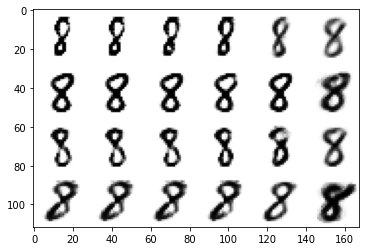

In [253]:
plt.imshow(final,cmap='gray')

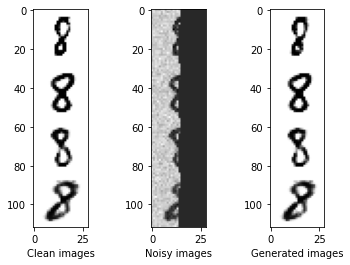

In [197]:
f = plt.figure()
f.add_subplot(1,3, 1)

plt.imshow(Clean,cmap='gray')
plt.xlabel('Clean images')
f.add_subplot(1,3, 2)
plt.imshow(Noise,cmap='gray')
plt.xlabel('Noisy images')
f.add_subplot(1,3, 3)
plt.imshow(Noisy400,cmap='gray')
plt.xlabel('Generated images')
plt.show(block=True)
plt.show()

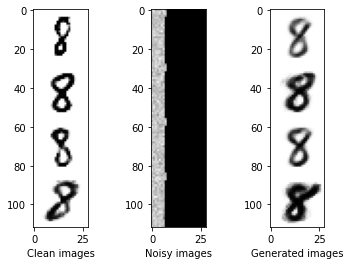

In [223]:
f = plt.figure()
f.add_subplot(1,3, 1)

plt.imshow(Clean,cmap='gray')
plt.xlabel('Clean images')
f.add_subplot(1,3, 2)
plt.imshow(Noise,cmap='gray')
plt.xlabel('Noisy images')
f.add_subplot(1,3, 3)
plt.imshow(Noisy200,cmap='gray')
plt.xlabel('Generated images')
plt.show(block=True)
plt.show()

# Task3

In [260]:
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw2/data23.mat')
Xi=data['X_i']
Xn=torch.tensor(data['X_n'],dtype=torch.float)

In [257]:
T=[]
j=0
for i in range(49):
    places=np.array([0,1,2,3])+(i%7)*4
    array=np.zeros(28)
    whole_array=np.zeros(784)
    array[places]=1
    arrow=np.kron(np.ones((1,4)),array)[0]
    if((i+1)%7==0 and j!=6):
        j+=1
    whole_array[112*(j):112*(j+1)]=arrow
    T.append(whole_array)
T2=torch.tensor((1/16*np.array(T).reshape(49,784)),dtype=torch.float)

In [258]:
Z_finals=[]
Iters=1000
for k in range(4):
    Z=torch.tensor(np.random.normal(0, 1, (10)),dtype=torch.float,requires_grad=True)
    optimizer = torch.optim.Adam([Z], lr=5e-2)
    for i in range(Iters):
        X=Gen(Z)
        Error=Cost(T2,X,Z,Xn[:,k])
        optimizer.zero_grad()
        Error.backward()
        optimizer.step()
        if i%100==0:
            print(f'Image: {k},Epoch: {i},Error:{Error.item()}')
    Z_finals.append(Z)

Image: 0,Epoch: 0,Error:15.014254570007324
Image: 0,Epoch: 100,Error:-222.76988220214844
Image: 0,Epoch: 200,Error:-228.0066375732422
Image: 0,Epoch: 300,Error:-228.0057373046875
Image: 0,Epoch: 400,Error:-228.00619506835938
Image: 0,Epoch: 500,Error:-228.0052032470703
Image: 0,Epoch: 600,Error:-227.99740600585938
Image: 0,Epoch: 700,Error:-228.00550842285156
Image: 0,Epoch: 800,Error:-227.9875946044922
Image: 0,Epoch: 900,Error:-228.0004119873047
Image: 1,Epoch: 0,Error:31.8808650970459
Image: 1,Epoch: 100,Error:-115.23810577392578
Image: 1,Epoch: 200,Error:-115.60771179199219
Image: 1,Epoch: 300,Error:-115.60774230957031
Image: 1,Epoch: 400,Error:-115.60773468017578
Image: 1,Epoch: 500,Error:-115.60773468017578
Image: 1,Epoch: 600,Error:-115.60774230957031
Image: 1,Epoch: 700,Error:-115.60771942138672
Image: 1,Epoch: 800,Error:-115.60773468017578
Image: 1,Epoch: 900,Error:-115.60771942138672
Image: 2,Epoch: 0,Error:43.617645263671875
Image: 2,Epoch: 100,Error:-118.10102081298828
Imag

In [259]:
Xn[:,0].shape

torch.Size([49])

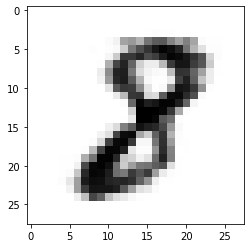

In [685]:
G=Gen(Z_finals[3])
plt.imshow(G.reshape(28,28).T.detach().numpy(),cmap='gray')

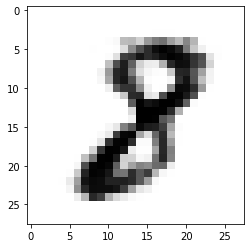

In [686]:
plt.imshow(Xi[:,3].reshape(28,28).T.detach().numpy(),cmap='gray')

In [262]:
Xclean,Xnoise,G=[],[],[]
for i in range(4):
    Xclean.append(Xi[:,i].reshape(28,28).T)
Clean=np.concatenate((Xclean),axis=0)
for i in range(4):
    Xnoise.append(Xn[:,i].reshape(7,7).T)
Noise=np.concatenate((Xnoise),axis=0)
for i in range(4):
    G.append(Gen(Z_finals[i]).reshape(28,28).T.detach().numpy())
Generated=np.concatenate((G),axis=0)

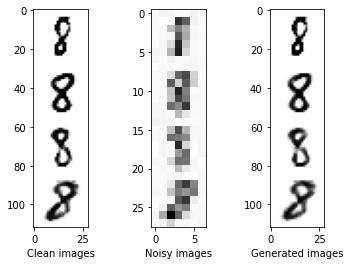

In [263]:
f = plt.figure()
f.add_subplot(1,3, 1)

plt.imshow(Clean,cmap='gray')
plt.xlabel('Clean images')
f.add_subplot(1,3, 2)
plt.imshow(Noise,cmap='gray')
plt.xlabel('Noisy images')
f.add_subplot(1,3, 3)
plt.imshow(Generated,cmap='gray')
plt.xlabel('Generated images')
plt.show(block=True)
plt.show()